In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Identitas Kelompok
Nomor Kelompok: 7

Nama Kelompok: Data Bank Squad

Anggota kelompok:
1. Fiori Rainal Destian (ketua)
2. Hilman Prayudi
3. Dinda Kanya Anky Putri
4. Julio Chandra Sugianto
5. Maggie Teresa Diaz
6. Safeil Umam

Pilihan Dataset: Banking Marketing Target

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

rcParams['figure.figsize'] = (18, 12)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.spines.bottom'] = True
rcParams['axes.spines.left'] = True

df = pd.read_csv('/content/drive/MyDrive/Final Project Rakamin/train.csv', sep=';')

In [ ]:
# melakukan label encoding untuk mengubah tipe data pada kolom y menjadi int
mapping_y = { 'yes' : 1,
              'no' : 0}

df['y'] = df['y'].map(mapping_y)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


Hasil Pengamatan :

-. Tidak ada data yg missing values dari hasil pengamatan.

In [ ]:
#membagi data numerics dan categorics
nums = ['balance', 'day', 'age', 'duration', 'campaign', 'pdays', 'previous']
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 
        'month', 'poutcome', 'y']

In [ ]:
df[nums].describe()

,balance,day,age,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,15.806419,40.936210,258.163080,2.763841,40.197828,0.580323
std,3044.765829,8.322476,10.618762,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,8.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,16.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,21.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,31.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Hasil Pengamatan :

-. Pada data numerical terdapat data yg memiliki nilai minus(-) yaitu pada kolom balance dan pdays.

-. Pada data categorical terdapat nilai unique yg sangat besar pada kolom job dan month.

# Univariate Analysis

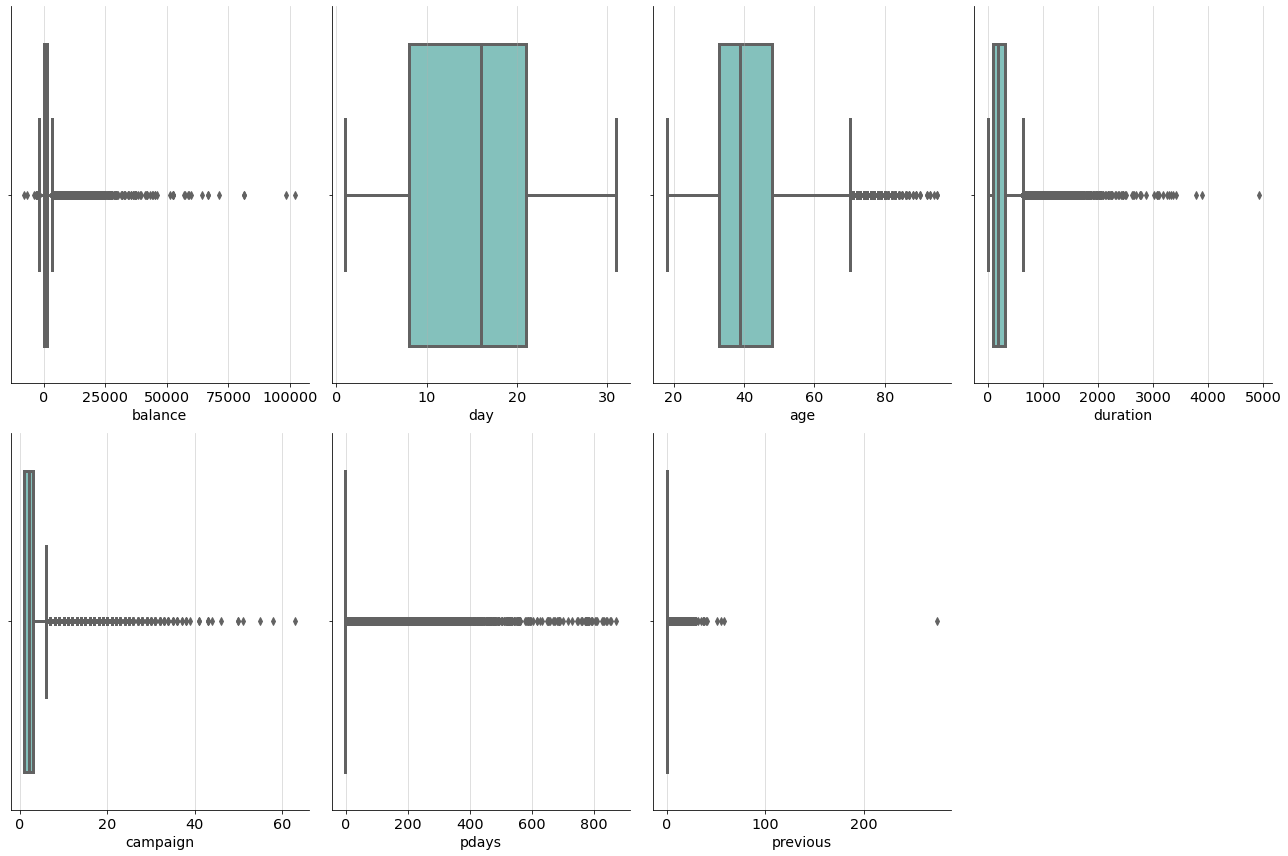

In [ ]:
for i, col in enumerate(nums):
    plt.subplot(2, 4, i+1)            
    sns.boxplot(
        x=df[col], 
        orient='h',
        palette='GnBu'
    )
    plt.xlabel(col, fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()

plt.show() 

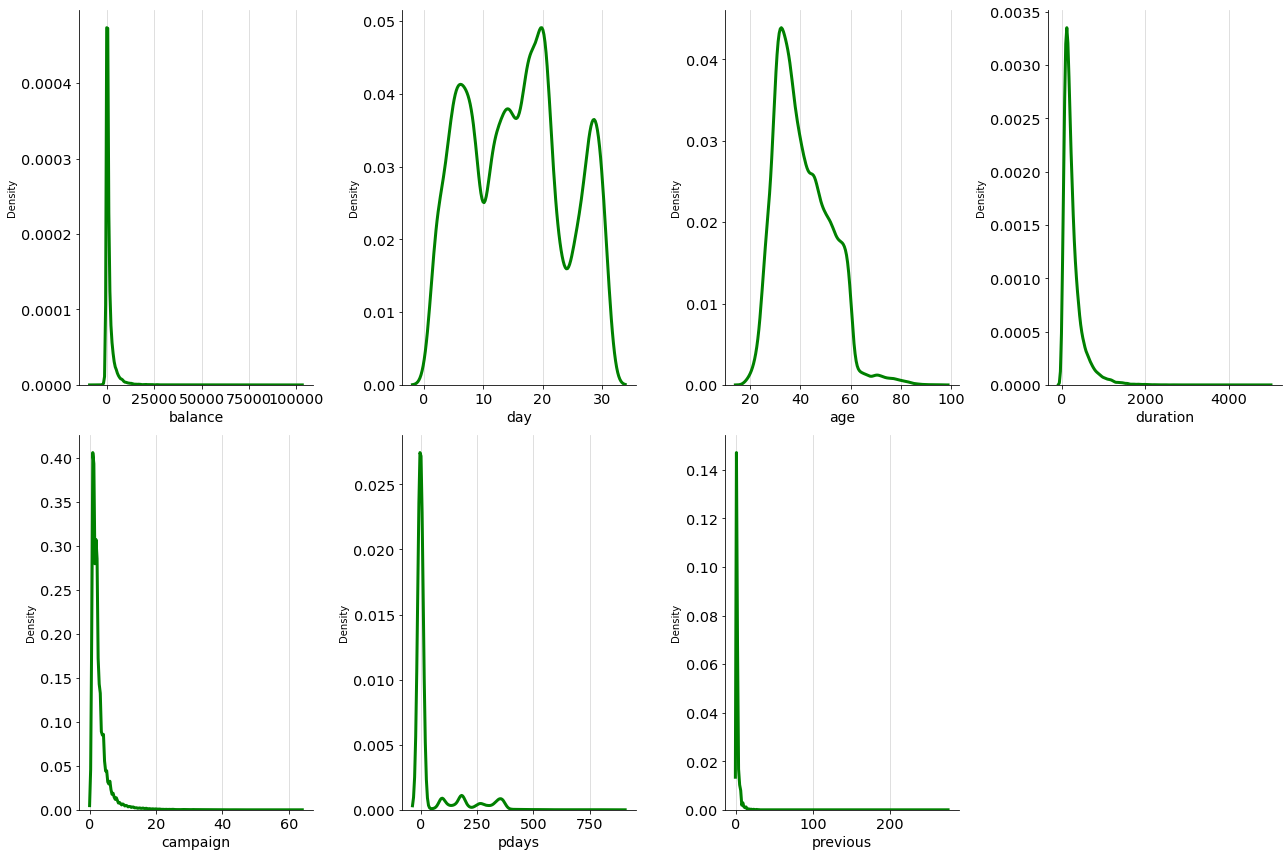

In [ ]:
for i, col in enumerate(nums):
    plt.subplot(2, 4, i+1)            
    sns.kdeplot(
        x=df[col], 
        color='green'
    )
    plt.xlabel(col, fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()

plt.show()

Hasil Pengamatan :

-. Berdasarkan boxplot di samping hampir semua data numerik memiliki banyak outlier kecuali kolom day yang tidak memiliki outlier sama sekali.

-. Mayoritas plot di samping memiliki distribusi right-skewed.

-. Kolom pdays, dan previous memiliki jarak antar quartile yang sangat berdekatan.


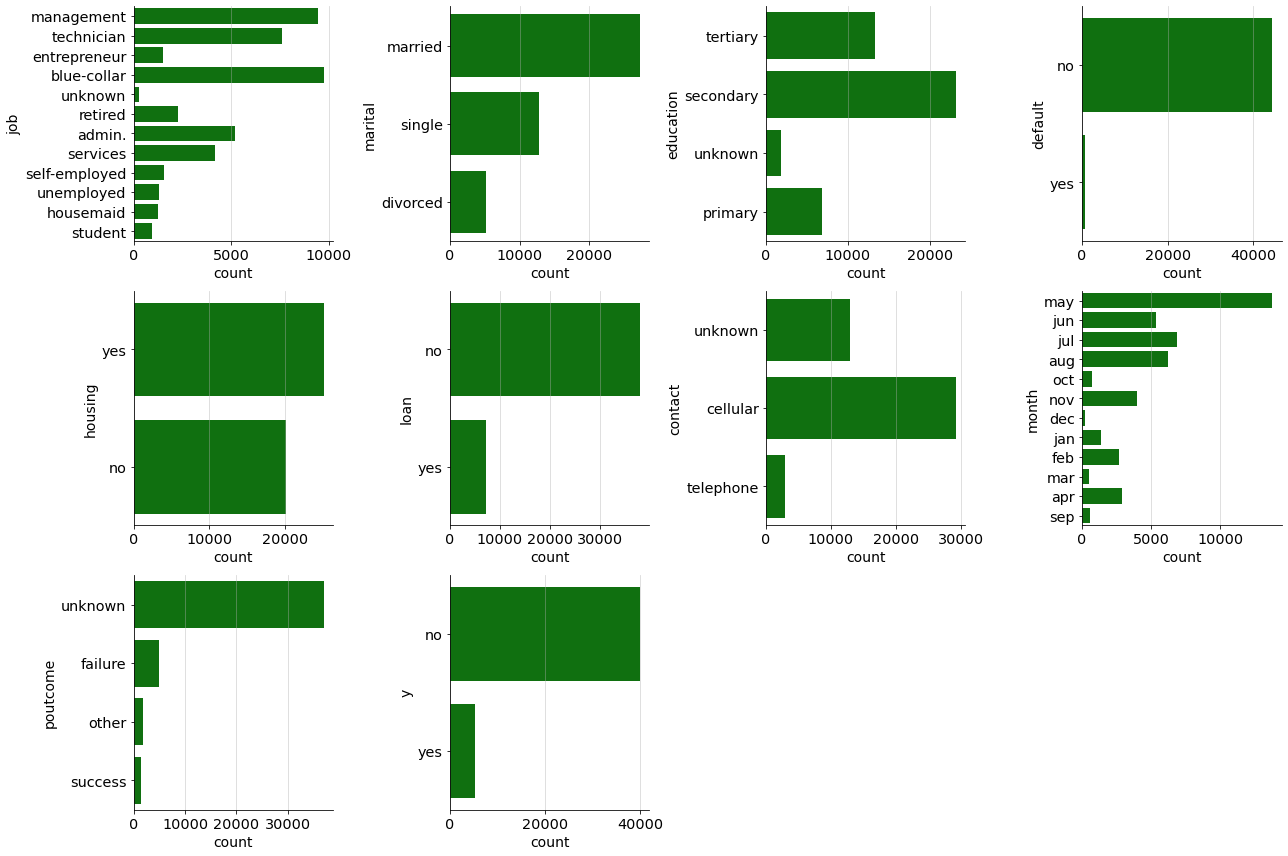

In [ ]:
for i, col in enumerate(cats):
    plt.subplot(3, 4, i+1)
    sns.countplot(
        y=df[col], 
        color='green', 
        orient='v'
    )
    plt.xlabel("count", fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.ylabel(col, fontsize=14)
    plt.tight_layout()

plt.show()

Hasil pengamatan :

-. Pada boxplot banyak sekali outliers.

-. pada kdeplot sebagian besar data right skewed dan masih jauh dari distribusi normal.

# Multivariate Analysis

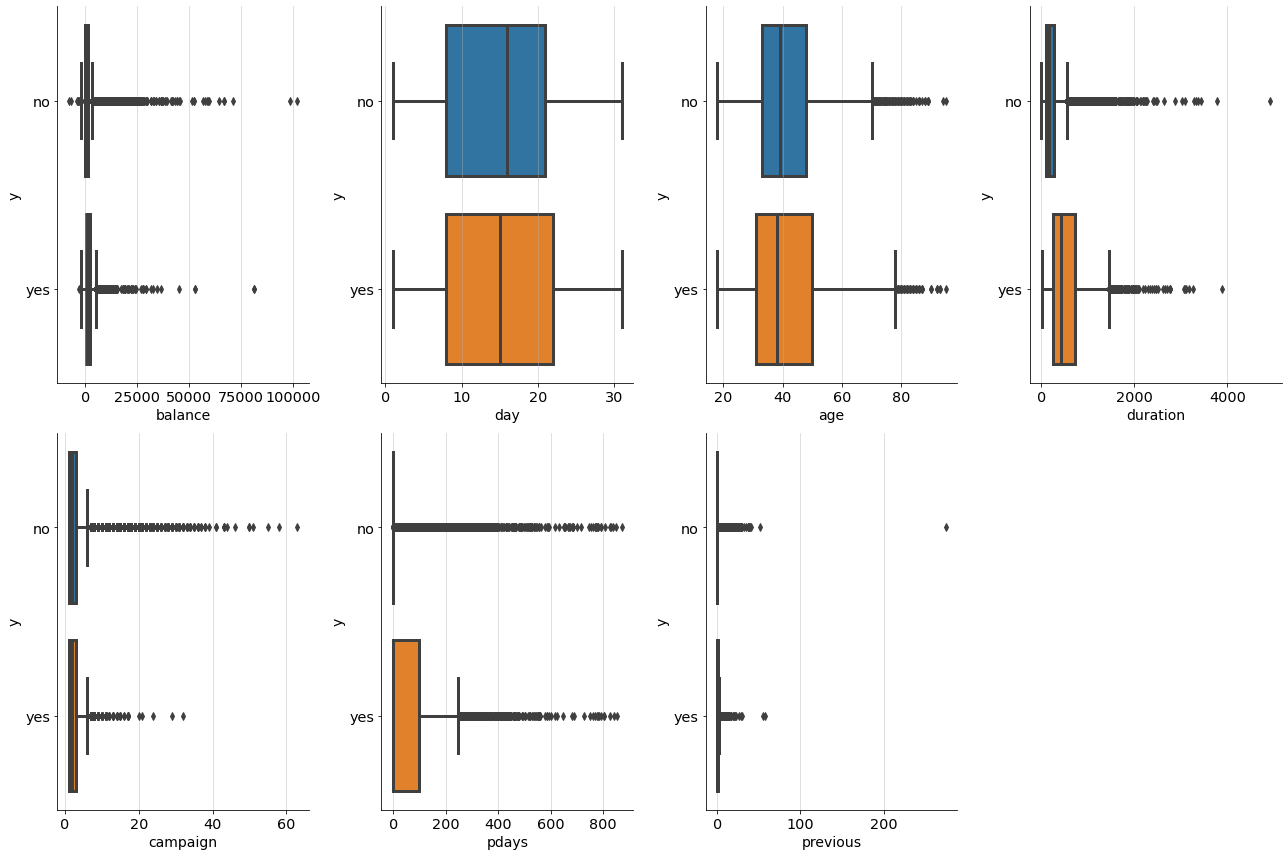

In [ ]:
for i, col in enumerate(nums):
    plt.subplot(2, 4, i+1)
    sns.boxplot(
        y=df['y'], 
        x=df[col], 
        orient='h'
    )
    plt.xlabel(col, fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()

plt.show()

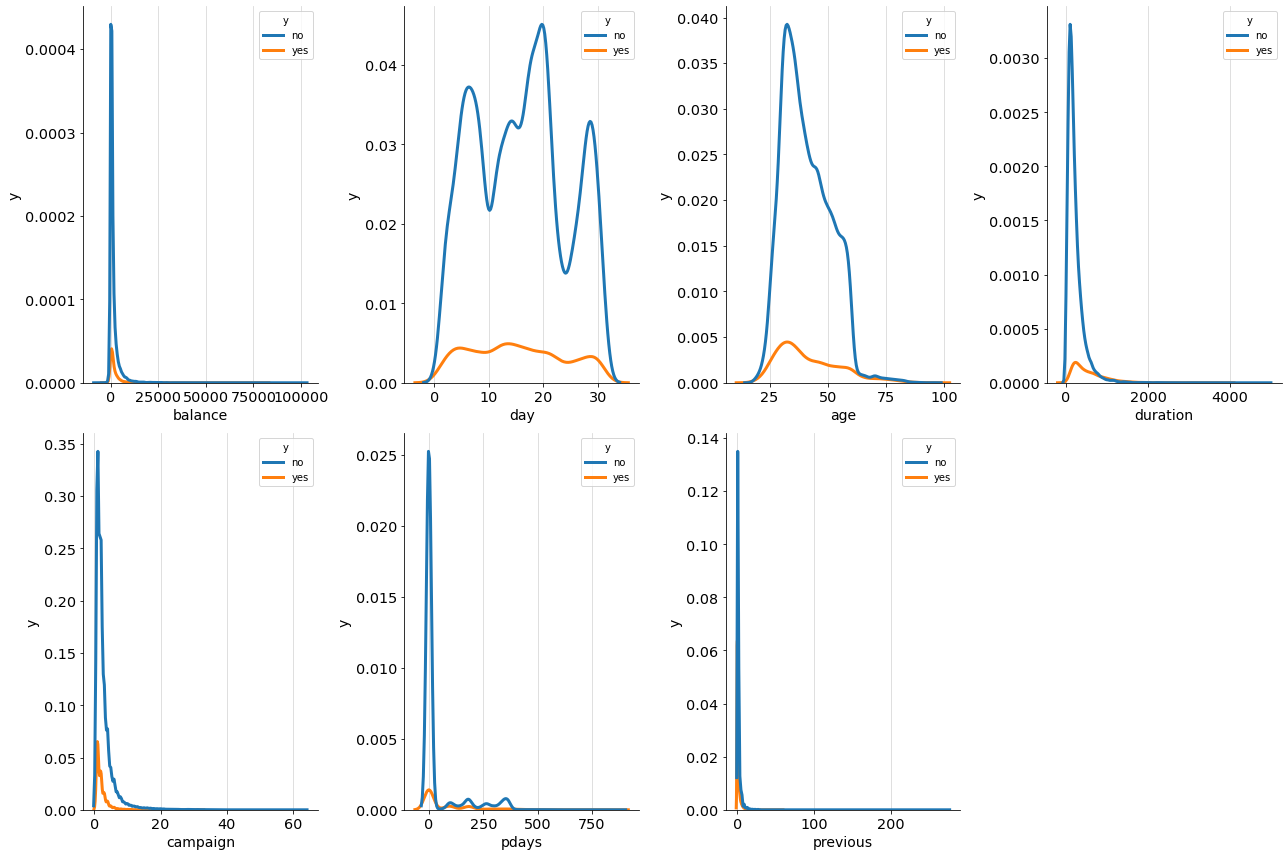

In [ ]:
for i, col in enumerate(nums):
    plt.subplot(2, 4, i+1)
    sns.kdeplot( 
        x=df[col],
        hue=df['y']
    )
    plt.xlabel(col, fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()

plt.show()

Hasil Pengamatan :

-. Berdasarkan diagram umur, terlihat kebanyakan customer yang membuka deposito memiliki umur di rentang umur 25-40 tahun (usia produktif).

-. Pada kondisi penawaran deposito yang rendah (durasi penawaran produk yang rendah), Customer cenderung tidak membuka deposito.

-. Pada kolom durasi dan pdays menunjukan kebanyakan customer yang membuka deposito memiliki durasi last contact yang lebih lama, dan memiliki jumlah hari yang tinggi setelah di kontak oleh campaign sebelumnya.


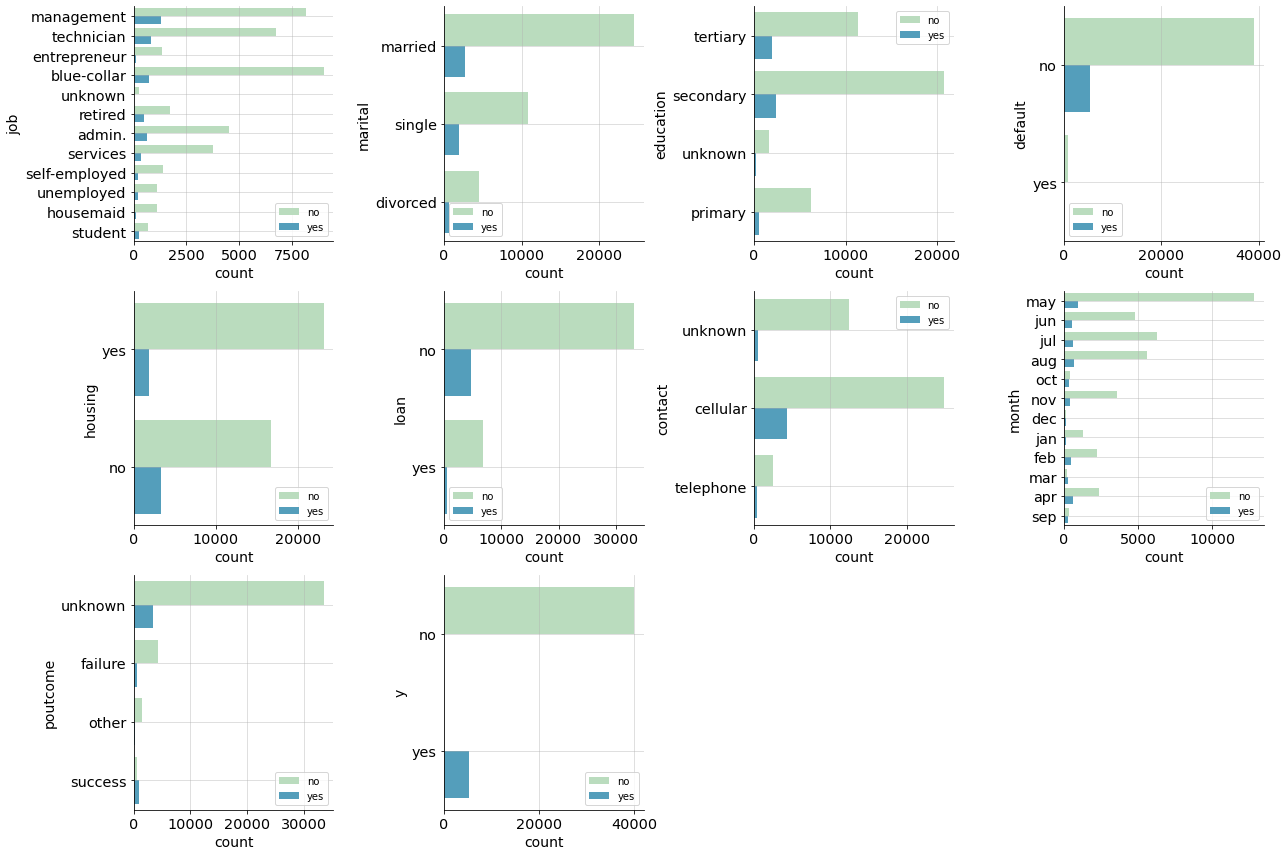

In [ ]:
for i, col in enumerate(cats):
    plt.subplot(3, 4, i+1)
    sns.countplot(
        y=df[col], 
        palette='GnBu', 
        orient='v',
        hue=df['y']
    )
    plt.xlabel("count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.grid(axis='y', alpha=0.5)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.legend()

plt.show()

Hasil Pengamatan :

-. Customer yang tidak memiliki loan lebih banyak yang berlangganan deposito dibandingkan dengan yang memiliki personal loan dan housing loan.

-. Pekerjaan management, technician, dan blue-collar paling banyak berlangganan deposito.

-. Bulan Januari dan Desember hampir tidak ada yang berlangganan deposito.

-. Secara umum perbandingan customer yang berlangganan deposito dengan yang tidak sangat jauh, lebih banyak yang tidak berlangganan.


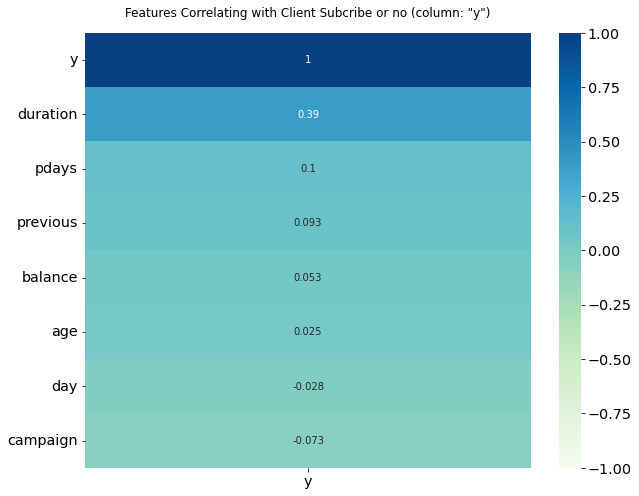

In [23]:
fig = plt.figure(figsize=(10,8))
heatmap = sns.heatmap(df.corr()[['y']].sort_values(by='y', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')
heatmap.set_title('Features Correlating with Client Subcribe or no (column: "y")', fontdict={'fontsize':12}, pad=16);

Hasil Analisa :

-. Duration memiliki moderate positive correlation dengan kolom y.

-. Pdays, Previous, Balance memiliki moderate positive correlation dengan kolom y. 

-. Age memiliki low positive correlation dengan kolom y.

-. Day memiliki low negative correlation dengan kolom y.


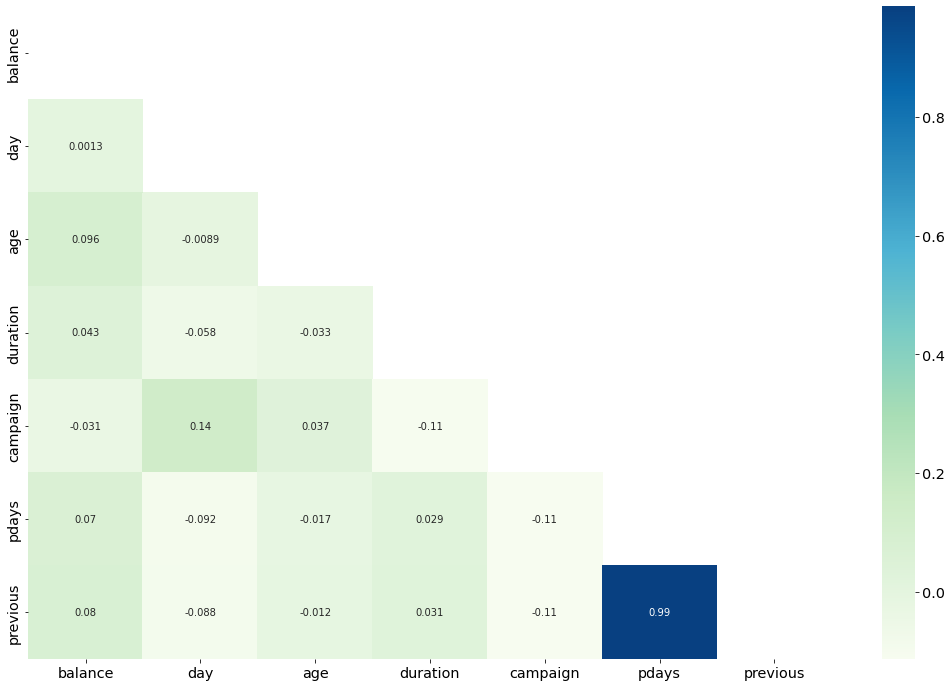

In [ ]:
data = df[nums].corr(method='spearman')
sns.heatmap(
    data, 
    mask=np.triu(np.ones_like(data)),
    cmap='GnBu', annot=True
)
plt.show()

Hasil Analisa :

-. Previous dan Pdays memiliki very high positive correlation, pilih salah satu feature untuk training.

-. campaign dan day memiliki high positive correlation pilih salah satu feature untuk training.

-. age dan balance memiliki moderate positive correlation pilih salah satu feature untuk training.

-. previous dan balance memiliki high positive correlation pilih salah satu feature untuk training.


# Bussiness Insight

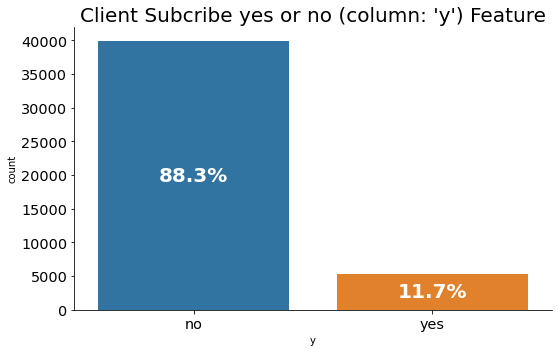

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='y')
for i in ax.patches:
  ax.text(x=i.get_x()+i.get_width()/2,
          y=i.get_height()/2,
          s=f"{np.round(i.get_height()/len(df)*100,2)}%",
          ha="center",
          va="center",
          size=20,
          weight="bold",
          rotation="360",
          color="white")
plt.title("Client Subcribe yes or no (column: 'y') Feature", size=20)
plt.tight_layout()
plt.show()

Data target (y) terdiri dari :

-. 88.3% nilai no (Customer yg tidak membuka akun deposito).
 
-. 11.7% nilai yes (customer yg membuka akun deposito).

-. Sehingga dapat disimpulkan bahwa masih banyak customer yang belum memiliki akun deposito pada Bank X.

In [ ]:
def ratio_revenue(data, count, by):
  result = []
  for i in range(len(data)):
    result.append(data[count][i] / data[data[by] == data[by][i]][count].sum() * 100)
  return result

In [ ]:
df_v = df.groupby(['month','y']).aggregate({'y':'count'})
df_v.rename(columns={'y':'Total'},inplace=True)
df_v.reset_index(inplace=True)
df_v['Ratio'] = ratio_revenue(df_v, 'Total', 'month')

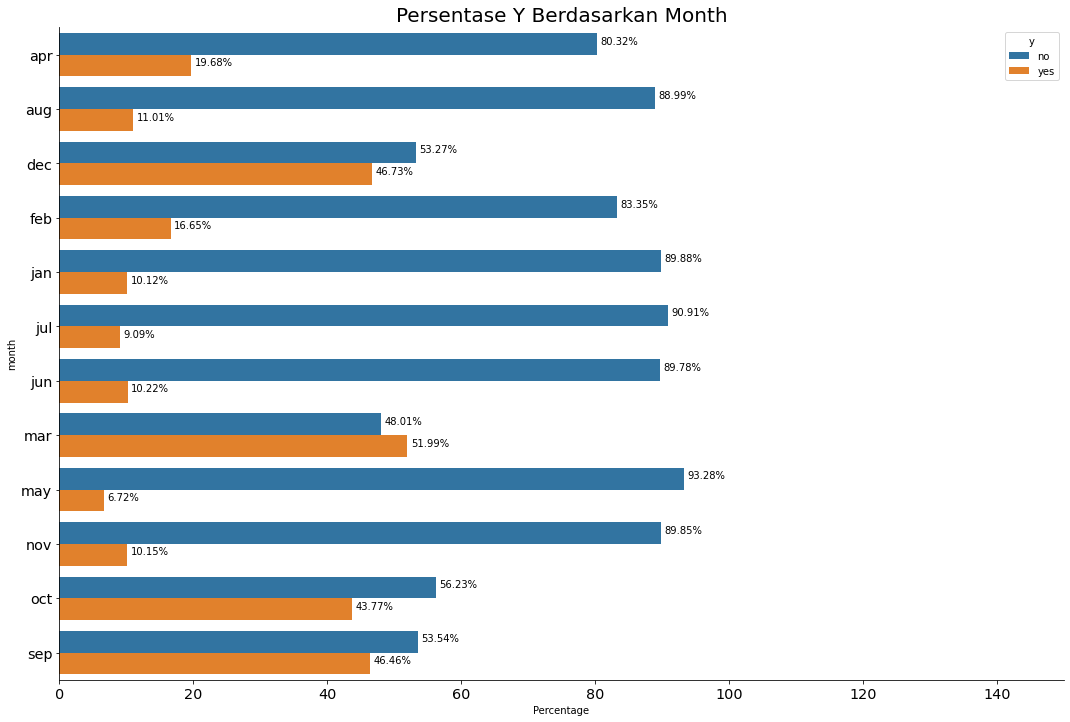

In [ ]:
sns.barplot(x='Ratio', y='month', hue='y', data=df_v)
for i in range(0, len(df_v), 2):
  plt.text(df_v.Ratio[i]+0.5, (i/2)-0.2, '{:,.2f}%'.format(df_v.Ratio[i]))
  plt.text(df_v.Ratio[i+1]+0.5, (i/2)+0.2, '{:,.2f}%'.format(df_v.Ratio[i+1]))
plt.xlim([0,150])
plt.title('Persentase Y Berdasarkan Month', size=20)
plt.xlabel('Percentage')
plt.show()

Pada bulan Agustus, Januari, Juli, Juni, May, dan November jumlah nasabah yg membuka akun deposito kurang dari 15%. Sedangkan pada bulan Desember, Oktober, September dan Maret jumlah nasabah yang membuka akun deposito cenderung tinggi dengan persentase terbesar di bulan Maret yaitu 51,99%.

In [ ]:
df_v = df.groupby(['contact','y']).aggregate({'y':'count'})
df_v.rename(columns={'y':'Total'},inplace=True)
df_v.reset_index(inplace=True)
df_v['Ratio'] = ratio_revenue(df_v, 'Total', 'contact')

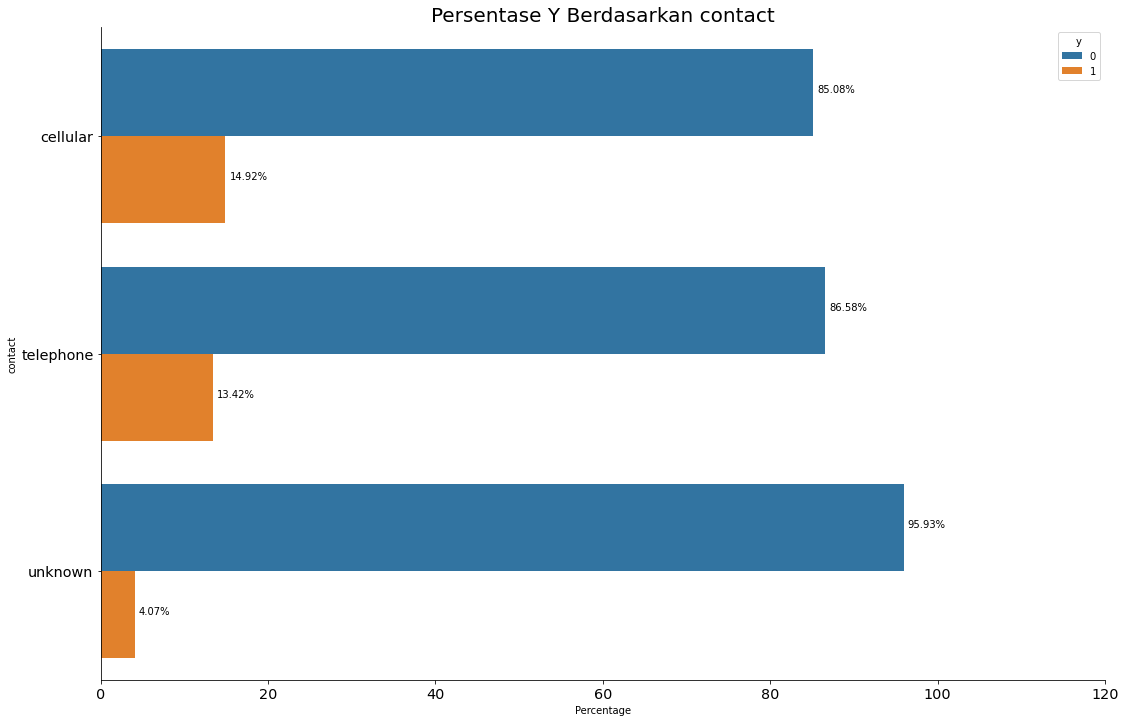

In [ ]:
sns.barplot(x='Ratio', y='contact', hue='y', data=df_v)
for i in range(0, len(df_v), 2):
  plt.text(df_v.Ratio[i]+0.5, (i/2)-0.2, '{:,.2f}%'.format(df_v.Ratio[i]))
  plt.text(df_v.Ratio[i+1]+0.5, (i/2)+0.2, '{:,.2f}%'.format(df_v.Ratio[i+1]))
plt.xlim([0,120])
plt.title('Persentase Y Berdasarkan contact', size=20)
plt.xlabel('Percentage')
plt.show()

Nasabah yg menggunakan telepon selular cenderung lebih banyak yg membuka akun deposito, dibandingkan telepon rumah, dan unknown.

In [ ]:
df_v = df.groupby(['housing','y']).aggregate({'y':'count'})
df_v.rename(columns={'y':'Total'},inplace=True)
df_v.reset_index(inplace=True)
df_v['Ratio'] = ratio_revenue(df_v, 'Total', 'housing')

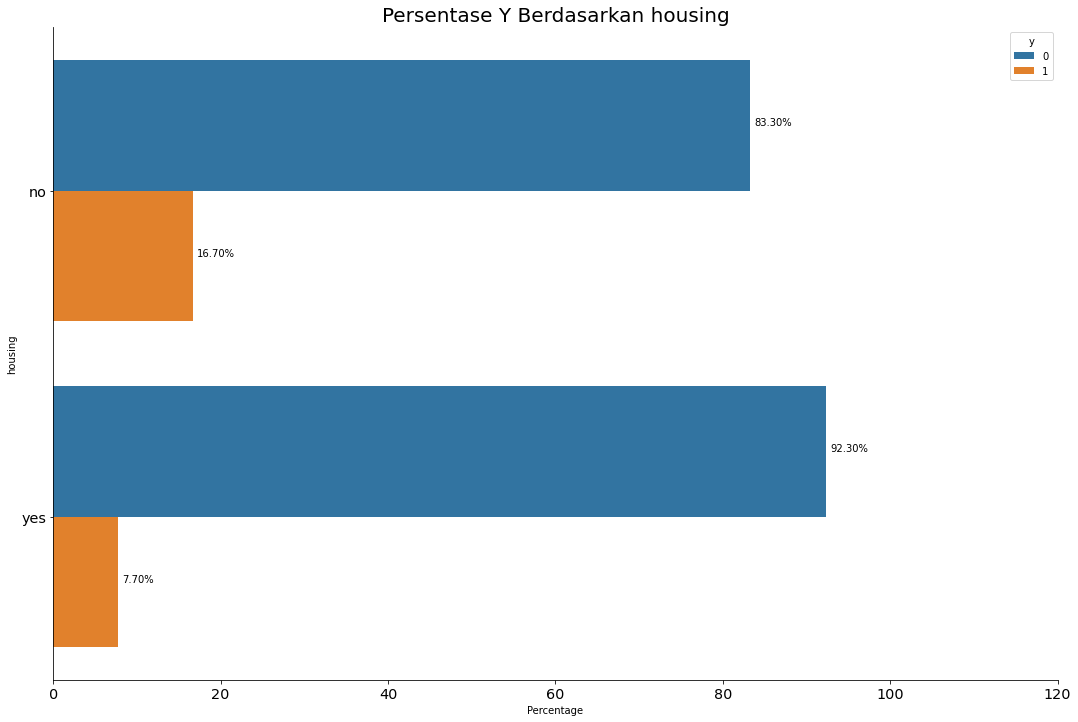

In [ ]:
sns.barplot(x='Ratio', y='housing', hue='y', data=df_v)
for i in range(0, len(df_v), 2):
  plt.text(df_v.Ratio[i]+0.5, (i/2)-0.2, '{:,.2f}%'.format(df_v.Ratio[i]))
  plt.text(df_v.Ratio[i+1]+0.5, (i/2)+0.2, '{:,.2f}%'.format(df_v.Ratio[i+1]))
plt.xlim([0,120])
plt.title('Persentase Y Berdasarkan housing', size=20)
plt.xlabel('Percentage')
plt.show()

Nasabah yang tidak memiliki cicilan rumah lebih banyak membuka akun deposito dibandingkan yang sudah memiliki cicilan rumah.

In [ ]:
df_v = df.groupby(['poutcome','y']).aggregate({'y':'count'})
df_v.rename(columns={'y':'Total'},inplace=True)
df_v.reset_index(inplace=True)
df_v['Ratio'] = ratio_revenue(df_v, 'Total', 'poutcome')

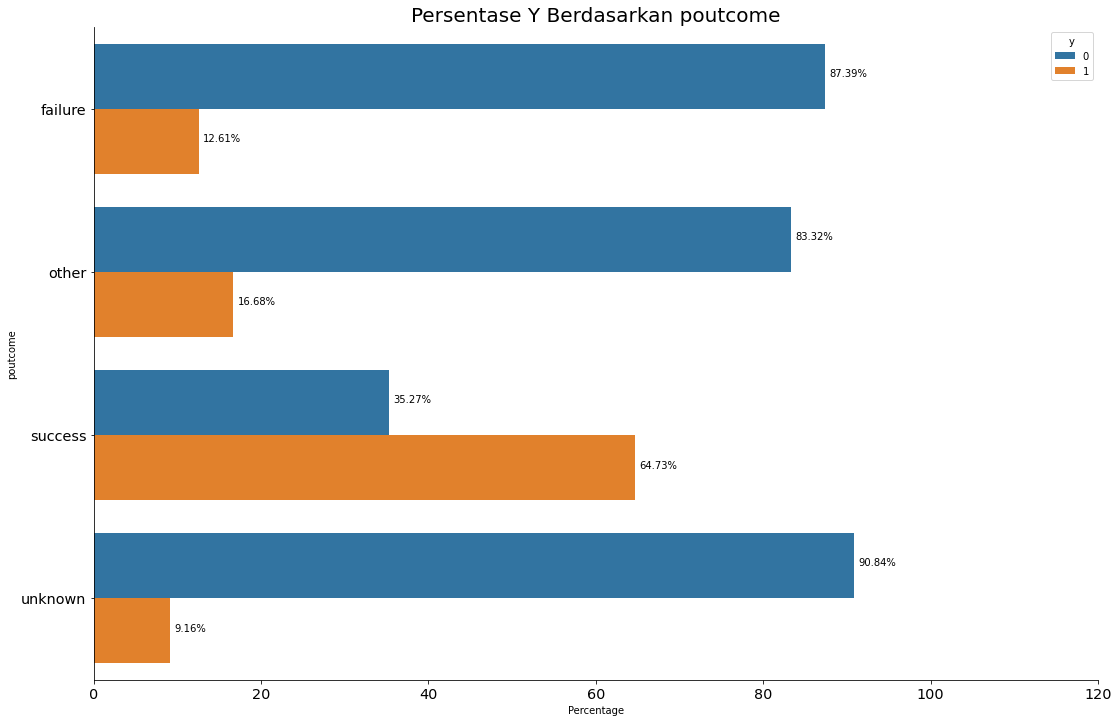

In [ ]:
sns.barplot(x='Ratio', y='poutcome', hue='y', data=df_v)
for i in range(0, len(df_v), 2):
  plt.text(df_v.Ratio[i]+0.5, (i/2)-0.2, '{:,.2f}%'.format(df_v.Ratio[i]))
  plt.text(df_v.Ratio[i+1]+0.5, (i/2)+0.2, '{:,.2f}%'.format(df_v.Ratio[i+1]))
plt.xlim([0,120])
plt.title('Persentase Y Berdasarkan poutcome', size=20)
plt.xlabel('Percentage')
plt.show()

Dari hasil campaign team marketing sebelumnya, didapatkan bahwa tingkat customer yang akhirnya membuka akun deposito sangat tinggi, sebesar 64,73% (success).